In [41]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot

In [42]:
''' Plot parameters. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (5, 2.5)
fig_label_fontsize = 10
ft = fm.FontProperties('Times New Roman')
ft.set_size(10.0)

In [43]:

new_color = [
'#b3e2cd',
'#fdcdac',
'#cbd5e8',
'#f4cae4',
'#e6f5c9',
'#fff2ae',
'#f1e2cc',
'#cccccc',
]


''' Stage Size: Load data from file. '''
csv_path = './1_performance/lowassoc.csv'
workload_list = ['502', '503', '505', '507', '519', '520', '527', '549', '554', '557', 'twi', 'web', 'resnet50', 'resnext50', 'YCSB-A', 'YCSB-B', 'Geomean']
scheme_list = ['Unison Cache', 'DICE', 'Baryon-64B', 'Baryon']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

stagesize_title = 'Normalized Performance'
fig_name = 'graph_perf_lowassoc'
stagesize_ylim = (0, 2.0)
stagesize_yticks = list(np.arange(stagesize_ylim[0], stagesize_ylim[1]+0.01, 0.5))


unisoncache_color = new_color[0]
base_color = new_color[1]
baryon_color = new_color[2]
dice_color = new_color[6]
hybrid2_color = new_color[3]
baryon_64B_color = easypyplot.color.color_scale(baryon_color, 2, low=0.7, high=1.0)[-1]
baryon_high_color = easypyplot.color.COLOR_SET[0]
low_bar_colors = [unisoncache_color, dice_color, baryon_64B_color, baryon_color]
assert len(low_bar_colors) == len(scheme_dict)

# pprint(stagesize_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
stagesize_xlabels = []
stagesize_xticks = []
stagesize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        stagesize_data_2darr.append(row_value)
        workload_shortname = workload_fullname
        if workload_fullname.endswith('_r'):
            workload_shortname = workload_fullname[0:3]
        stagesize_xlabels.append(workload_shortname)
        xtick += 1
        stagesize_xticks.append(xtick)
assert len(stagesize_data_2darr) == len(stagesize_xlabels) == len(stagesize_xticks)

pprint(stagesize_data_2darr)

pprint(low_bar_colors)

[[3.3863, 3.7562, 4.257, 3.8869],
 [3.1111, 3.5098, 3.6236, 4.4633],
 [2.4659, 3.2452, 3.5832, 3.801],
 [3.7767, 4.2486, 4.4334, 3.922],
 [1.2692, 1.0154, 1.1379, 1.2222],
 [1.5361, 2.2922, 3.465, 3.4383],
 [3.6874, 2.9999, 4.2479, 3.8199],
 [3.6214, 3.9799, 5.2203, 6.93],
 [4.0294, 4.3374, 6.2473, 6.8096],
 [2.2999, 4.1564, 4.1565, 3.4847],
 [3.1551, 3.303, 4.7281, 4.4078],
 [2.8284, 2.8635, 4.8241, 4.4178],
 [3.0304, 3.3213, 4.2947, 3.9824],
 [3.3798, 3.1351, 4.1454, 4.2337],
 [1.5101, 1.5345, 1.6056, 1.7016],
 [1.5108, 1.5081, 1.6605, 1.784],
 [1.4789, 1.939, 3.7393, 3.9516],
 [2.5336, 3.8047, 3.3716, 4.0877],
 [2.5335, 2.8492, 3.4615, 3.6127]]
['#b3e2cd', '#f1e2cc', (0.875, 0.9181034482758621, 1.0, 1.0), '#cbd5e8']


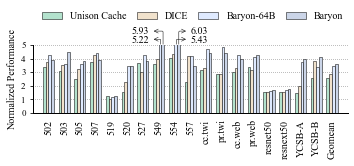

In [44]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
stagesize_ax = fig.add_subplot(1, 1, 1)
# stagesize_ax2 = stagesize_ax.twinx()
# easypyplot.format.turn_off_box(stagesize_ax, twinx_axes=stagesize_ax2)
easypyplot.format.turn_off_box(stagesize_ax)
stagesize_h = easypyplot.barchart.draw(
    stagesize_ax, stagesize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=stagesize_xlabels,
    xticks=stagesize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90,
    colors=low_bar_colors)
''' x axis '''
stagesize_ax.set_xlim([stagesize_ax.get_xticks()[0] - 1, stagesize_ax.get_xticks()[-1] + 1])
stagesize_ax.set_xticks(stagesize_xticks)
stagesize_ax.set_xticklabels(stagesize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
stagesize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# stagesize_ax.tick_params(direction='in') # [in, out, inout]
stagesize_ax.set_xlabel('', fontproperties=ft)
''' y axis '''
stagesize_ax.yaxis.grid(True)
stagesize_ax.set_ylim([0, 5])
stagesize_ax.set_yticks([0, 1, 2, 3, 4, 5])
stagesize_ax.set_ylabel(stagesize_title, multialignment='center', fontproperties=ft)
# stagesize_ax2.set_ylim([0., 1.])
# stagesize_ax2.set_ylabel('Committed Block Hit Rate', multialignment='center', fontproperties=ft)
''' legend '''
# h, l = stagesize_ax.get_legend_handles_labels()
# stagesize_ax.legend(handles=[item for item in h[:-1]], labels= [item for item in l[:-1]])
arrowprop = dict(arrowstyle='<-', color='k', connectionstyle="angle,angleA=0,angleB=90,rad=1")
stagesize_ax.annotate('5.22', xy=(7 + fig_bar_width / 4  - 0.05, 4.9), xytext=(5.3, 5.2), xycoords='data',
                        fontproperties=ft, arrowprops=arrowprop)
stagesize_ax.annotate('5.93', xy=(7 + fig_bar_width / 4  + 0.1, 4.9), xytext=(5.3, 5.8), xycoords='data',
                        fontproperties=ft, arrowprops=arrowprop)
stagesize_ax.annotate('5.43', xy=(8 + fig_bar_width / 4  - 0.05, 4.9), xytext=(9, 5.2), xycoords='data',
                        fontproperties=ft, arrowprops=arrowprop)
stagesize_ax.annotate('6.03', xy=(8 + fig_bar_width / 4  + 0.1, 4.9), xytext=(9, 5.8), xycoords='data',
                        fontproperties=ft, arrowprops=arrowprop)
# stagesize_ax.text(6 + fig_bar_width - 2.7, 5.1, 'Baryon-64B: 5.22\nBaryon:5.93', color='#000000', fontproperties=ft)
# stagesize_ax.text(8 + fig_bar_width - 0.3, 5.1, 'Baryon-64B: 5.43\nBaryon:6.03', color='#000000', fontproperties=ft)

legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(stagesize_h, legend, loc='upper left', bbox_to_anchor=(0.1, 1.02),
        ncol=4, frameon=False, prop=ft, columnspacing=1, labelspacing=0.1)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.8)

In [45]:
''' Save figures'''
fig.savefig('./graph_perf_lowassoc.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures

## High-assoc

In [46]:

''' Stage Size: Load data from file. '''
csv_path = './1_performance/highassoc.csv'
workload_list = ['502', '503', '505', '507', '519', '520', '527', '549', '554', '557', 'twi', 'web', 'resnet50', 'resnext50', 'YCSB-A', 'YCSB-B', 'Geomean']
scheme_list = ['Hybrid2', 'Baryon-FA']
workload_dict = {item: item for item in workload_list}
scheme_dict = {item: item for item in scheme_list}

stagesize_title = 'Normalized Performance'
fig_name = 'graph_perf_highassoc'
stagesize_ylim = (0, 1.6)
stagesize_yticks = list(np.arange(stagesize_ylim[0], stagesize_ylim[1]+0.01, 0.5))

baryon_high_color = easypyplot.color.color_scale(baryon_color, 2, low=0.8, high=0.9) [1]
stagesize_bar_colors = [hybrid2_color, baryon_high_color]
assert len(stagesize_bar_colors) == len(scheme_dict)

# pprint(stagesize_yticks)
csv_hd = pd.read_csv(csv_path, sep=',')
stagesize_xlabels = []
stagesize_xticks = []
stagesize_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        stagesize_data_2darr.append(row_value)
        workload_shortname = workload_fullname
        if workload_fullname.endswith('_r'):
            workload_shortname = workload_fullname[0:3]
        stagesize_xlabels.append(workload_shortname)
        xtick += 1
        stagesize_xticks.append(xtick)
assert len(stagesize_data_2darr) == len(stagesize_xlabels) == len(stagesize_xticks)

pprint(stagesize_data_2darr)

pprint(stagesize_bar_colors)

[[1, 1.3617],
 [1, 1.175],
 [1, 1.1302],
 [1, 1.0414],
 [1, 0.8539],
 [1, 1.3283],
 [1, 0.99],
 [1, 2.0216],
 [1, 1.253],
 [1, 1.0],
 [1, 0.9891],
 [1, 1.3272],
 [1, 0.977],
 [1, 1.0415],
 [1, 1.216],
 [1, 1.211],
 [1, 1.2572],
 [1, 1.308],
 [1, 1.137]]
['#f4cae4', (0.7892156862745098, 0.8280933062880325, 0.9019607843137255, 1.0)]


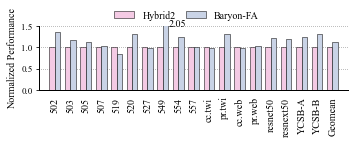

In [47]:
''' Ploting script '''
fig_dims = (5, 2)
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
stagesize_ax = fig.add_subplot(1, 1, 1)
# stagesize_ax2 = stagesize_ax.twinx()
# easypyplot.format.turn_off_box(stagesize_ax, twinx_axes=stagesize_ax2)
easypyplot.format.turn_off_box(stagesize_ax)
stagesize_h = easypyplot.barchart.draw(
    stagesize_ax, stagesize_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=stagesize_xlabels,
    xticks=stagesize_xticks,
    xticklabelfontsize=fig_label_fontsize,
    xticklabelrotation=90,
    colors=stagesize_bar_colors)
''' x axis '''
stagesize_ax.set_xlim([stagesize_ax.get_xticks()[0] - 1, stagesize_ax.get_xticks()[-1] + 1])
stagesize_ax.set_xticks(stagesize_xticks)
stagesize_ax.set_xticklabels(stagesize_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
stagesize_ax.xaxis.set_ticks_position('none') # Comment this and the next line for visible ticks
# stagesize_ax.tick_params(direction='in') # [in, out, inout]
stagesize_ax.set_xlabel('', fontproperties=ft)
''' y axis '''
stagesize_ax.yaxis.grid(True)
stagesize_ax.set_ylim((0, 1.5))
stagesize_ax.set_yticks(stagesize_yticks)
stagesize_ax.set_ylabel(stagesize_title, multialignment='center', fontproperties=ft)
# stagesize_ax2.set_ylim([0., 1.])
# stagesize_ax2.set_ylabel('Committed Block Hit Rate', multialignment='center', fontproperties=ft)
''' legend '''
# h, l = stagesize_ax.get_legend_handles_labels()
# stagesize_ax.legend(handles=[item for item in h[:-1]], labels= [item for item in l[:-1]])

stagesize_ax.text(7 + fig_bar_width - 0.3, 1.5, '2.05', color='#000000', fontproperties=ft)
# stagesize_ax.text(14 + fig_bar_width - 0.3, 1.5, '1.62', color='#000000', fontproperties=ft)

legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(stagesize_h, legend, loc='upper left', bbox_to_anchor=(0.3, 1.05),
        ncol=3, frameon=False, prop=ft, columnspacing=1, labelspacing=0.1)

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(stagesize_ax, hratio=0.9)

In [48]:
''' Save figures'''
fig.savefig('./graph_perf_highassoc.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # it generates wierd chopped figures